# About Dataset
This dataset contains 7 features and a label column.

**long_hair** - This column contains 0's and 1's where 1 is "long hair" and 0 is "not long hair".

**forehead_width_cm** - This column is in CM's. This is the width of the forehead.

**forehead_height_cm** - This is the height of the forehead and it's in Cm's.

**nose_wide** - This column contains 0's and 1's where 1 is "wide nose" and 0 is "not wide nose".

**nose_long** - This column contains 0's and 1's where 1 is "Long nose" and 0 is "not long nose".

**lips_thin** - This column contains 0's and 1's where 1 represents the "thin lips" while 0 is "Not thin lips".

**distance_nose_to_lip_long** - This column contains 0's and 1's where 1 represents the "long distance between  nose and lips" while 0 is "short distance between nose and lips".

**gender** - This is either "Male" or "Female".



# Importing libraries

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


# Loading data

In [3]:
data = pd.read_csv("/home/ilaf/Desktop/ML projects/GenderClassification/datasource/gender_classification.csv")

In [4]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [6]:
data.shape

(5001, 8)

# Data Exploration and Preprocessing

In [7]:
data.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [8]:
data.describe(include = 'all')

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2501
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900,NaN
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049,NaN
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000,NaN
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,NaN


- In data, there is only one visible categorical feature, but most of the fetures are categorical given as continuous features which is data inconsistency.
- Only forehead_width_cm and forehead_height_cm are actucal continuous feature.
- Both the actual numerical features seems to have normal distribution. 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [10]:
data.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

- There is no null values in the data

In [11]:
data.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [12]:
numerical_data = ['forehead_width_cm','forehead_height_cm']
categorical_data = []
for col in data.columns:
    if col not in numerical_data:
        categorical_data.append(col)

In [13]:
numerical_data

['forehead_width_cm', 'forehead_height_cm']

In [14]:
categorical_data

['long_hair',
 'nose_wide',
 'nose_long',
 'lips_thin',
 'distance_nose_to_lip_long',
 'gender']

In [17]:
for col in categorical_data:
    print(data[col].value_counts())

1    4349
0     652
Name: long_hair, dtype: int64
0    2531
1    2470
Name: nose_wide, dtype: int64
1    2540
0    2461
Name: nose_long, dtype: int64
0    2535
1    2466
Name: lips_thin, dtype: int64
0    2506
1    2495
Name: distance_nose_to_lip_long, dtype: int64
Female    2501
Male      2500
Name: gender, dtype: int64


- Except long_hair all other features has balanced data.

# Exploratory Data Analysis

# Univariate Analysis

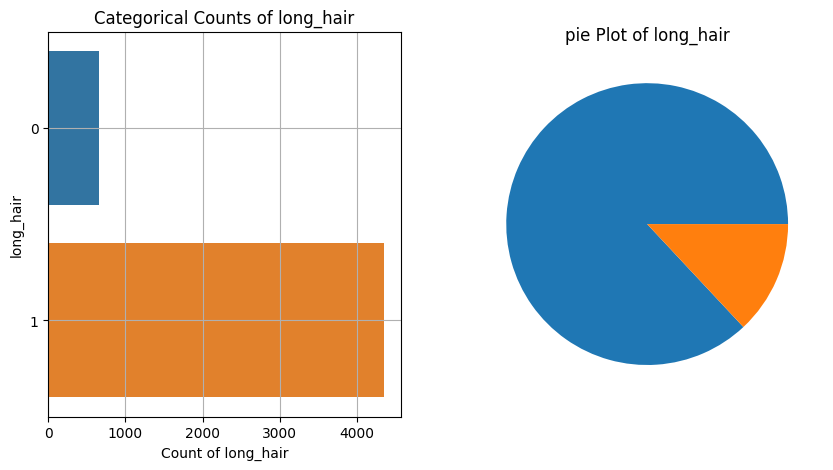

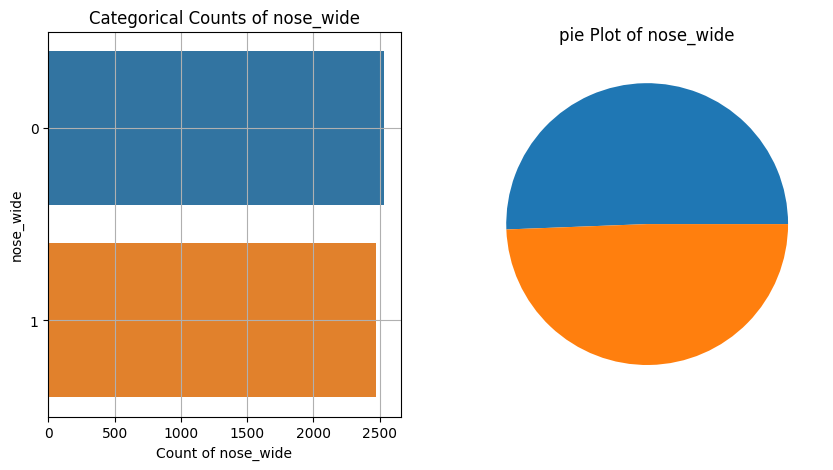

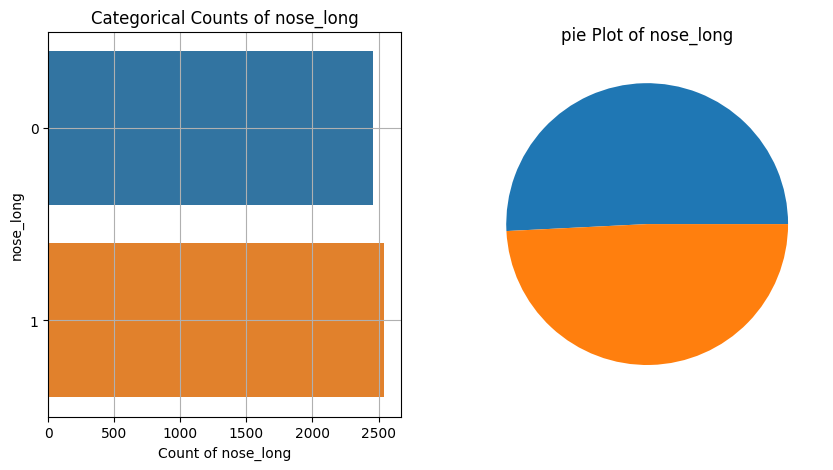

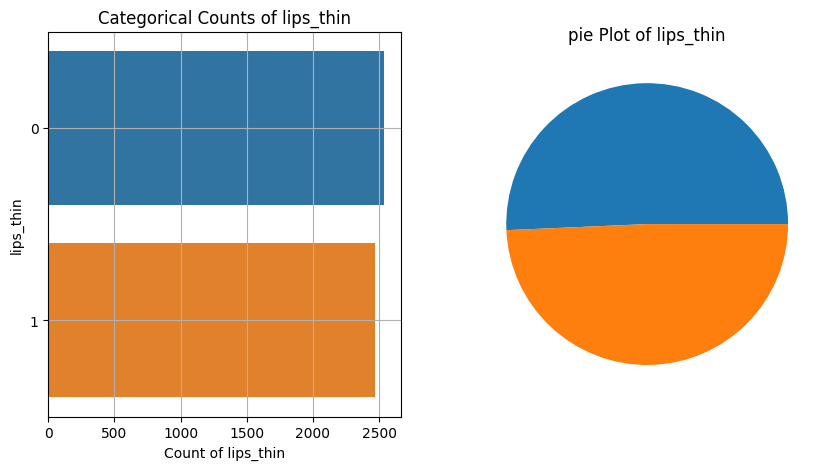

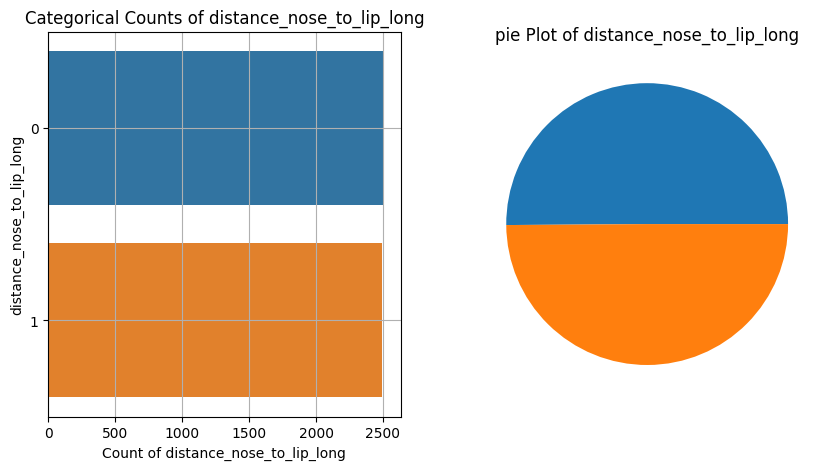

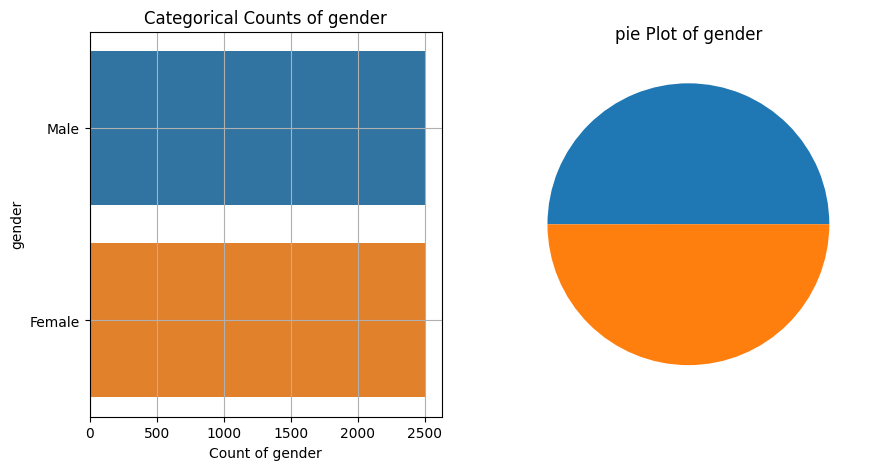

In [23]:
for col in categorical_data:
    plt.figure(figsize = [10,5])
    plt.subplot(1, 2, 1)
    plt.title("Categorical Counts of {}".format(col))
    sns.countplot(data = data, y = col)
    plt.xlabel("Count of {}".format(col))
    plt.ylabel(col)
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.title("pie Plot of {}".format(col))
    plt.pie(data[col].value_counts())
    plt.grid()
    plt.show()

- Maximum people are reported to have long hair.
- Even though there is not much significant difference but count of people with "not wide nose" is more.
- Number of people with "long nose" is more.
- Peope with "Not thin lips" are reported more.
- In feature "distance_nose_to_lip_long", there is no significant difference visible.
- Also for "gender" there is no significant difference visible.

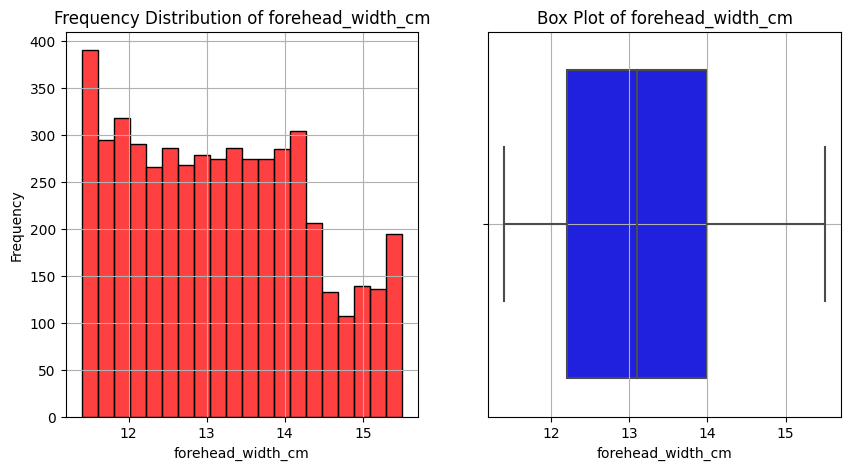

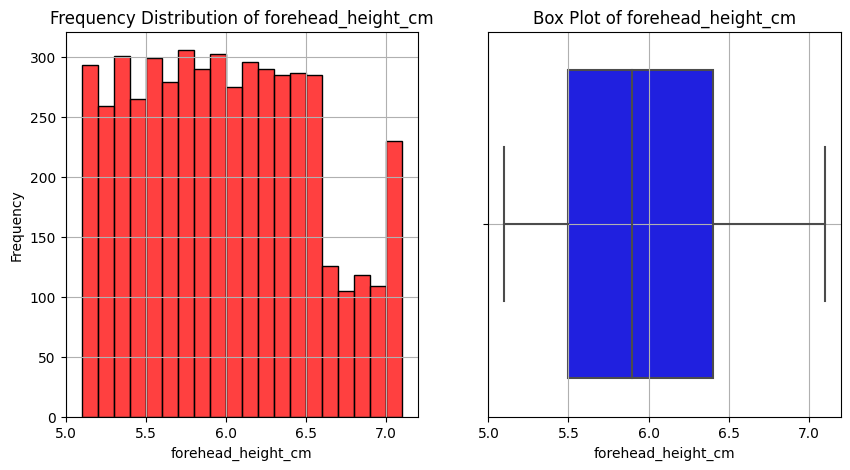

In [24]:
for col in numerical_data:
    plt.figure(figsize = [10,5])
    plt.subplot(1, 2, 1)
    plt.title("Frequency Distribution of {}".format(col))
    sns.histplot(data = data, x = col, color = "red", cbar = True)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.title("Box Plot of {}".format(col))
    sns.boxplot(data = data, x = col, color = "blue")
    plt.grid()
    plt.show()

- Both the numerical features show normal distibution

# Bivariate analysis.

In [25]:
data.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

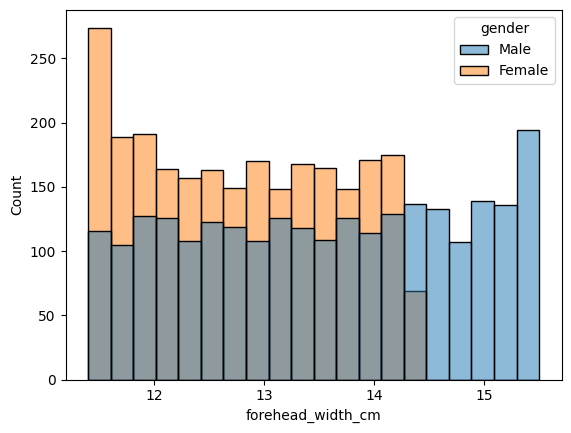

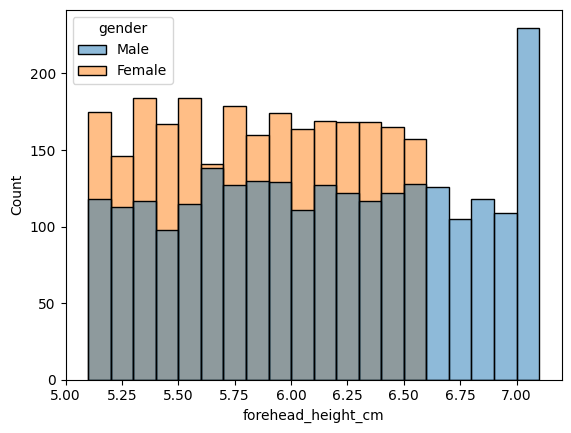

In [33]:
for col in numerical_data:
    sns.histplot(x = data[col],data=data , hue = "gender")
    plt.show()

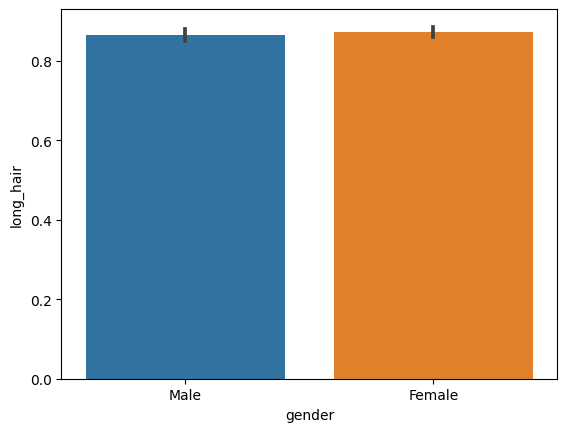

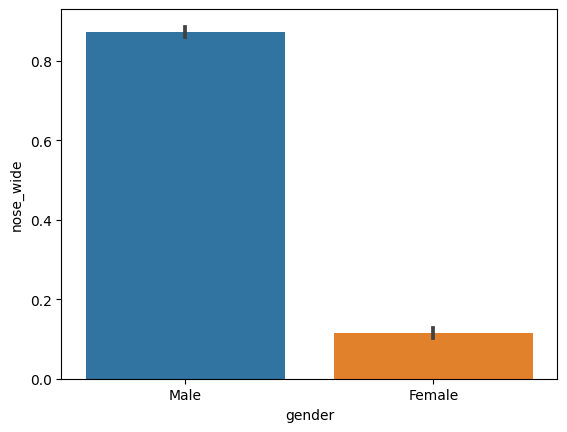

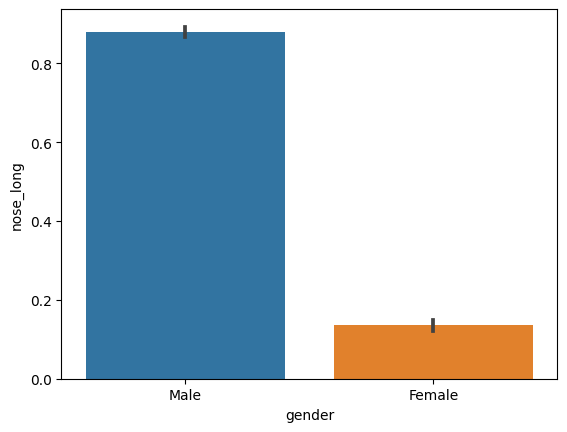

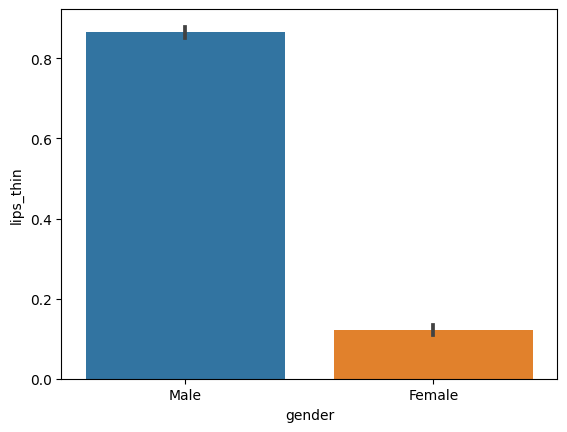

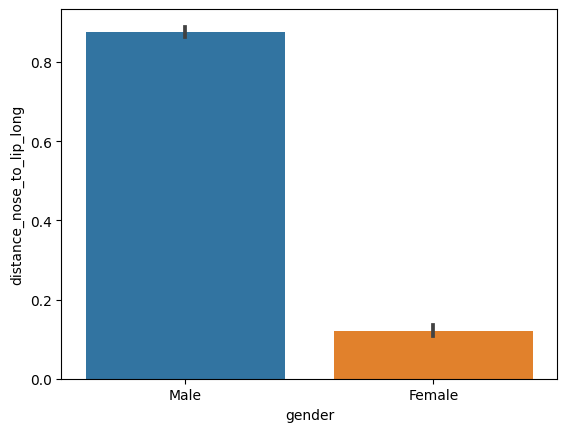

In [47]:
categorical_cols = ['long_hair',
 'nose_wide',
 'nose_long',
 'lips_thin',
 'distance_nose_to_lip_long']
for col in categorical_cols:
    sns.barplot(x="gender",y=col,data=data)
    plt.show()

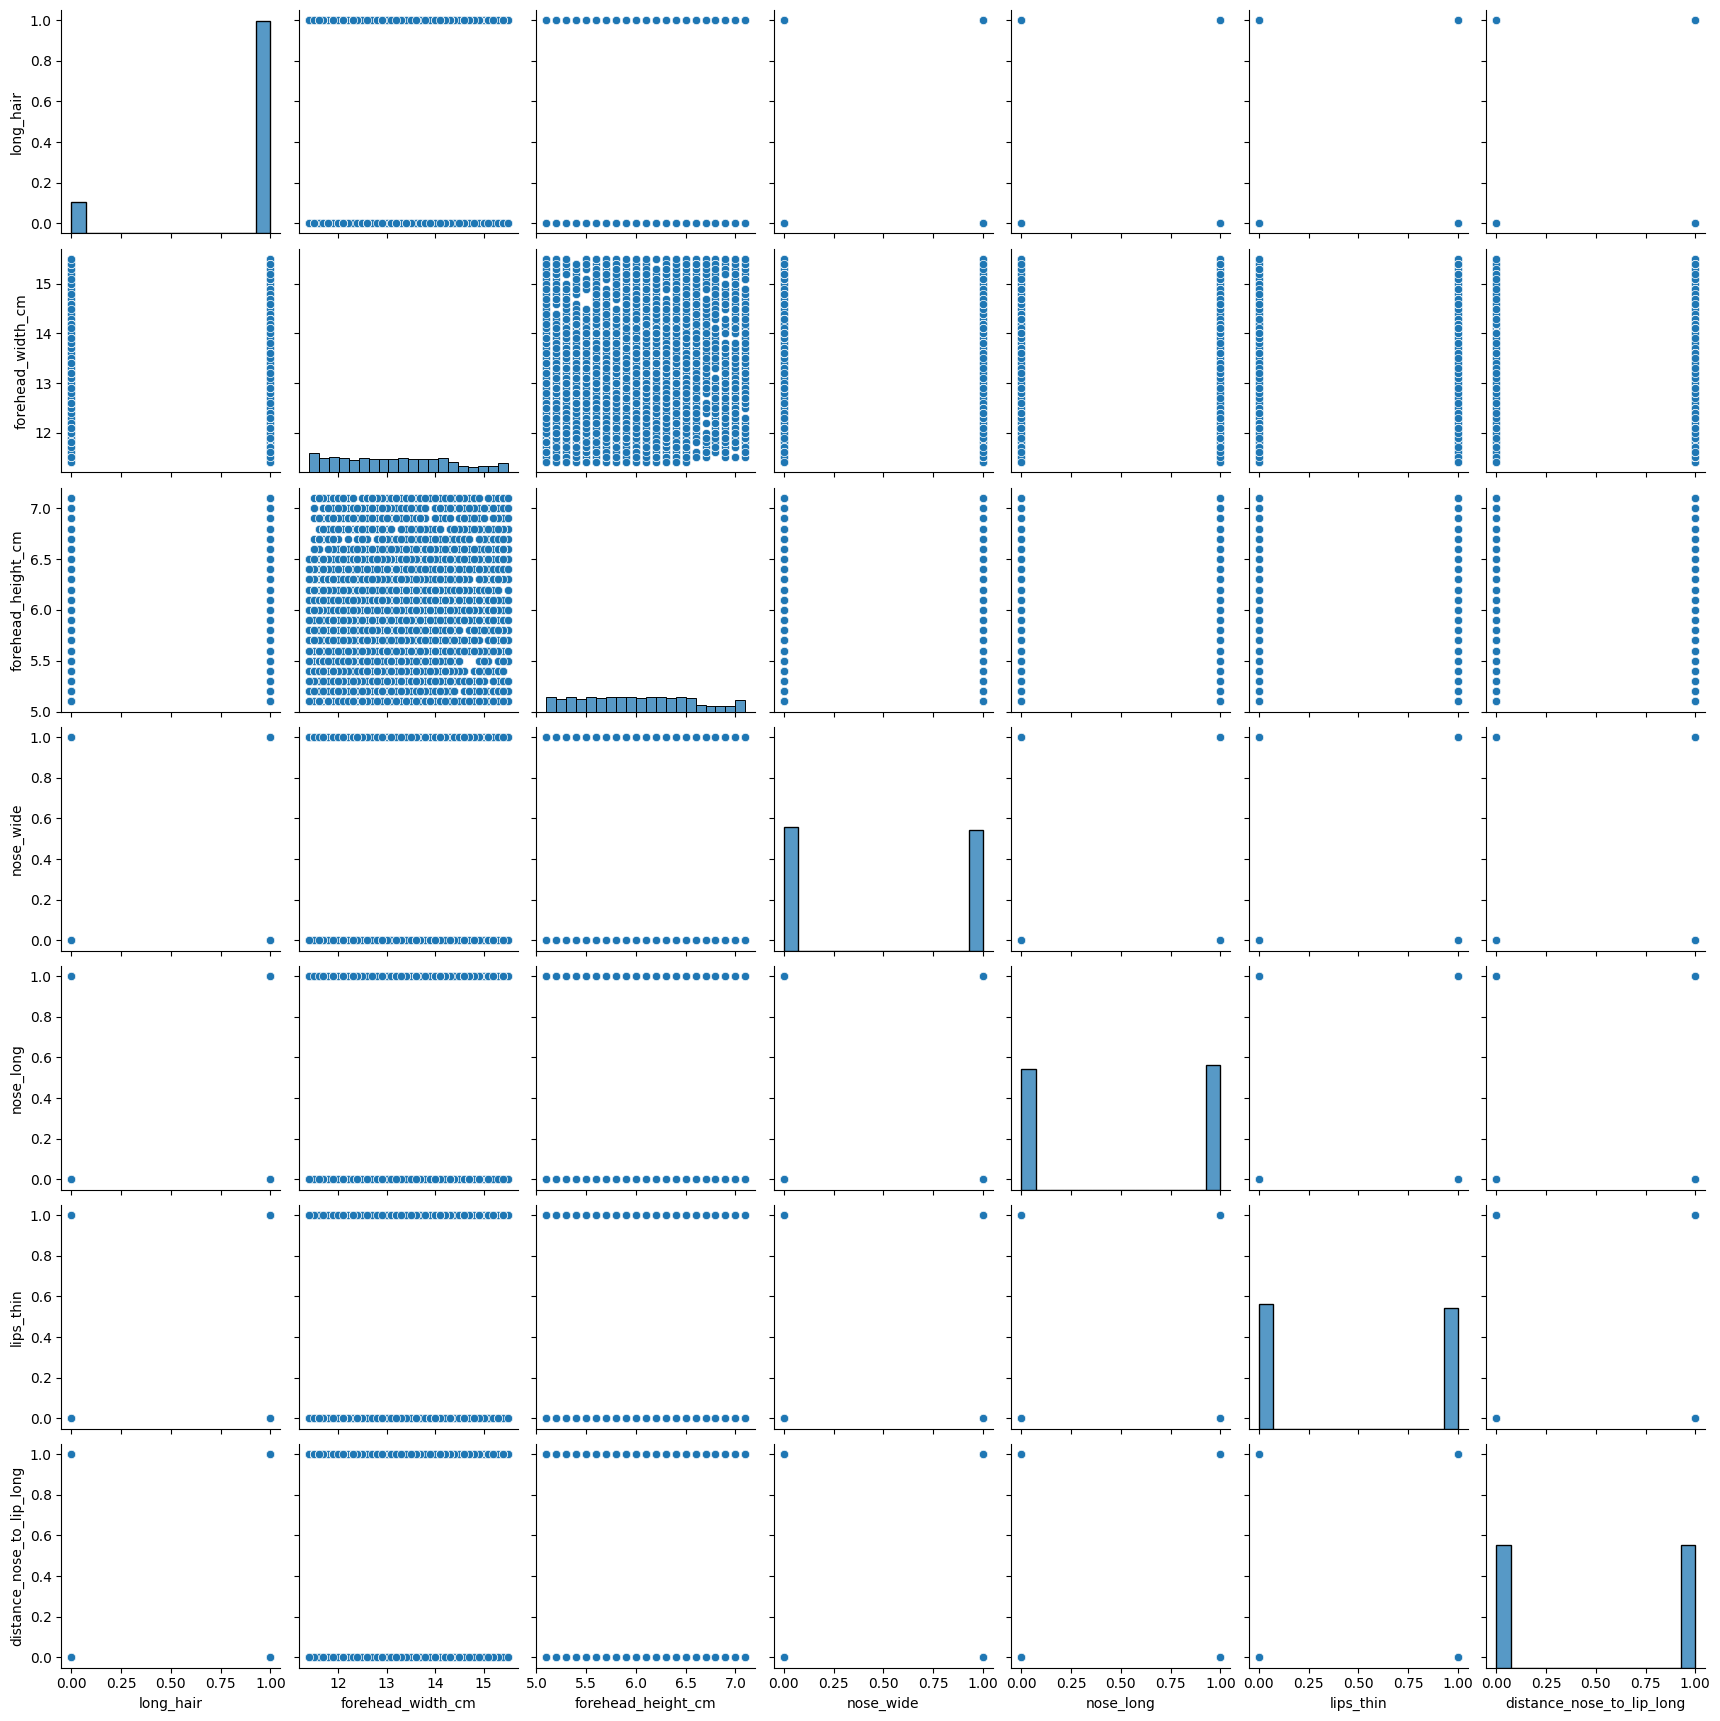

In [53]:
sns.pairplot(data)

<Axes: >

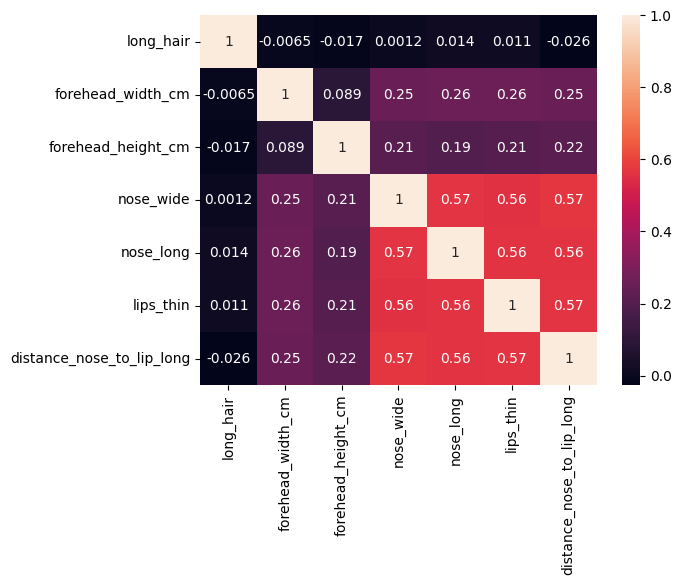

In [58]:
sns.heatmap(data.corr(), annot = True)

# Encoding data

In [59]:
data.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [61]:
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])

In [62]:
data.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [63]:
data.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                         int64
dtype: object

- Now all data is in numerical form which is better for further processing.
- After encoding "gender", 
            1 - male
            0 - female 

<Axes: >

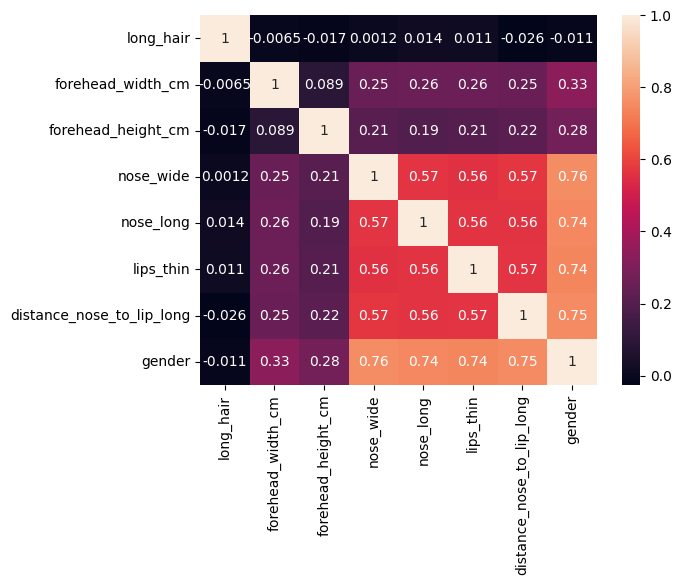

In [66]:
sns.heatmap(data.corr(), annot = True,)

- according to the heatmap, "long_hair", "forehead_width_cm", "forehead_height_cm" is not strongly correalted to "gender" 

# Train - Test model


In [67]:
x,y = data.drop(["gender"], axis =1 ), data["gender"]

In [68]:
x.shape, y.shape

((5001, 7), (5001,))

In [74]:
x_train,x_test,y_train,y_test = tts(x,y, test_size =  0.25)

In [75]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3750, 7), (1251, 7), (3750,), (1251,))

# Scaling Data

- As data shows normal or slightly skewed distribution we would be using standard scaler for scaling the data

In [78]:
scaler  = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

# Modelling

In [80]:
log_reg = LogisticRegression()
knn = KNeighborsClassifier()
clf = SVC()
dtc = DecisionTreeClassifier()
gnb = GaussianNB()

In [90]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [93]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [94]:
clf.fit(x_train, y_train)

SVC()

In [95]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [96]:
gnb.fit(x_train, y_train)

GaussianNB()

In [97]:
predictions_log_reg_train = log_reg.predict(x_train)
predictions_knn_train = knn.predict(x_train)
predictions_clf_train = clf.predict(x_train)
predictions_dtc_train = dtc.predict(x_train)
predictions_gnb_train = gnb.predict(x_train)

In [98]:
predictions_log_reg = log_reg.predict(x_test)
predictions_knn = knn.predict(x_test)
predictions_clf = clf.predict(x_test)
predictions_dtc = dtc.predict(x_test)
predictions_gnb = gnb.predict(x_test)

In [100]:
results_train_df = pd.DataFrame({"Actual_Data_train":y_train,
              "log_reg_predictions_train":predictions_log_reg_train,
              "KNN_predictions_train":predictions_knn_train,
              "SVC_predictions_train":predictions_clf_train,
              "DTC_predictions_train":predictions_dtc_train,
              "GNB_predictions_train":predictions_gnb_train})

In [102]:
results_train_df.head(25)

,Actual_Data_train,log_reg_predictions_train,KNN_predictions_train,SVC_predictions_train,DTC_predictions_train,GNB_predictions_train
4787,1,1,1,1,1,1
3213,1,1,1,1,1,1
4639,0,0,0,0,0,0
4099,1,1,1,1,1,1
2138,1,1,1,1,1,1
4647,1,1,1,1,1,1
3269,1,1,1,1,1,1
3746,1,1,1,1,1,1
4127,0,0,0,0,0,0
1826,1,1,1,1,1,1


In [103]:
results_df = pd.DataFrame({"Actual_Predictions":y_test,
              "log_reg_predictions":predictions_log_reg,
              "KNN_predictions":predictions_knn,
              "SVC_predictions":predictions_clf,
              "DTC_predictions":predictions_dtc,
              "GNB_predictions":predictions_gnb})

In [105]:
results_df.head(20)

,Actual_Predictions,log_reg_predictions,KNN_predictions,SVC_predictions,DTC_predictions,GNB_predictions
4025,0,0,0,0,0,0
2826,0,0,0,0,0,0
109,0,0,0,0,0,0
1514,0,0,0,0,0,0
4793,1,1,1,1,1,1
4750,1,1,1,1,1,1
1064,0,0,1,0,1,0
2657,0,0,0,0,0,0
4199,0,0,0,0,0,0
4553,1,1,1,1,1,1


In [108]:
print('\n')
print("The accuracy score for logistic regression model in train is :" ,
      accuracy_score(results_train_df["Actual_Data_train"],results_train_df["log_reg_predictions_train"])*100)

print("The accuracy score for logistic regression model in test is :" ,
      accuracy_score(results_df["Actual_Predictions"],results_df["log_reg_predictions"])*100)


print("\n")
print("The accuracy score for KNN model in train is :" ,
      accuracy_score(results_train_df["Actual_Data_train"],results_train_df["KNN_predictions_train"])*100)

print("The accuracy score for KNN model in test is :" ,
      accuracy_score(results_df["Actual_Predictions"],results_df["KNN_predictions"])*100)


print("\n")
print("The accuracy score for SVC model in train is :" ,
      accuracy_score(results_train_df["Actual_Data_train"],results_train_df["SVC_predictions_train"])*100)

print("The accuracy score for SVC model in test is :" ,
      accuracy_score(results_df["Actual_Predictions"],results_df["SVC_predictions"])*100)


print("\n")
print("The accuracy score for DTC model in train is :" ,
      accuracy_score(results_train_df["Actual_Data_train"],results_train_df["DTC_predictions_train"])*100)

print("The accuracy score for DTC model in test is :" ,
      accuracy_score(results_df["Actual_Predictions"],results_df["DTC_predictions"])*100)


print("\n")
print("The accuracy score for GNB model in train is :" ,
      accuracy_score(results_train_df["Actual_Data_train"],results_train_df["GNB_predictions_train"])*100)

print("The accuracy score for GNB model in test is :" ,
      accuracy_score(results_df["Actual_Predictions"],results_df["GNB_predictions"])*100)




The accuracy score for logistic regression model in train is : 96.90666666666667
The accuracy score for logistic regression model in test is : 96.40287769784173


The accuracy score for KNN model in train is : 97.41333333333333
The accuracy score for KNN model in test is : 96.88249400479616


The accuracy score for SVC model in train is : 97.25333333333333
The accuracy score for SVC model in test is : 96.96243005595524


The accuracy score for DTC model in train is : 99.86666666666667
The accuracy score for DTC model in test is : 96.40287769784173


The accuracy score for GNB model in train is : 97.11999999999999
The accuracy score for GNB model in test is : 96.88249400479616


- Almost all the model gives similar accuracy for train and test data.
- DTC model gives highest accuracy for train data.
- GNB model gives highest accuracy for test data.

In [109]:
log_reg_train = accuracy_score(results_train_df["Actual_Data_train"],results_train_df["log_reg_predictions_train"])*100
log_reg_test= accuracy_score(results_df["Actual_Predictions"],results_df["log_reg_predictions"])*100
KNN_train =  accuracy_score(results_train_df["Actual_Data_train"],results_train_df["KNN_predictions_train"])*100
KNN_test = accuracy_score(results_df["Actual_Predictions"],results_df["KNN_predictions"])*100
SVC_train = accuracy_score(results_train_df["Actual_Data_train"],results_train_df["SVC_predictions_train"])*100
SVC_test= accuracy_score(results_df["Actual_Predictions"],results_df["SVC_predictions"])*100
DTC_train =  accuracy_score(results_train_df["Actual_Data_train"],results_train_df["DTC_predictions_train"])*100
DTC_test = accuracy_score(results_df["Actual_Predictions"],results_df["DTC_predictions"])*100
GNB_train =  accuracy_score(results_train_df["Actual_Data_train"],results_train_df["GNB_predictions_train"])*100
GNB_test = accuracy_score(results_df["Actual_Predictions"],results_df["GNB_predictions"])*100

In [110]:
pd.DataFrame({"model":["log_reg_train","log_reg_test","KNN_train", "KNN_test","SVC_train","SVC_test","DTC_train", "DTC_test","GNB_train", "GNB_test"],
               "Accuracy Scores" :[log_reg_train,log_reg_test,KNN_train,KNN_test,SVC_train,SVC_test,DTC_train,DTC_test,GNB_train,GNB_test]})

,model,Accuracy Scores
0,log_reg_train,96.906667
1,log_reg_test,96.402878
2,KNN_train,97.413333
3,KNN_test,96.882494
4,SVC_train,97.253333
5,SVC_test,96.962430
6,DTC_train,99.866667
7,DTC_test,96.402878
8,GNB_train,97.120000
9,GNB_test,96.882494


# Hyperparameter Tuning

In [124]:
model_params = {
    
    'log_reg' : {
        'model' : LogisticRegression(),
        'params' : {
            "penalty":['l1', 'l2', 'elasticnet', None],
            "dual":[True, False]
        }
    },
    
    
    'KNN' :{
        'model' : KNeighborsClassifier(),
        'params' : {
            "n_neighbors": [3,4,5,6,7,8,9,10], 
            "algorithm":["auto","kd_tree"], 
            "n_jobs":[-1]
        }
    },
    
    'SVM' : {
        'model':SVC(gamma='auto'),
        'params' : {
            'C' : [1,10,20],
            'kernel':['rbf', 'linear']
        }
    },
    'DecisionTree' : {
        'model': DecisionTreeClassifier(),
        'params':{
           'criterion':['gini', 'entropy'],
        }
    },
    'GaussianNB':{
        'model':GaussianNB(),
        'params':{}
    }
    
}

In [125]:
model_params

{'log_reg': {'model': LogisticRegression(),
  'params': {'penalty': ['l1', 'l2', 'elasticnet', None],
   'dual': [True, False]}},
 'KNN': {'model': KNeighborsClassifier(),
  'params': {'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
   'algorithm': ['auto', 'kd_tree'],
   'n_jobs': [-1]}},
 'SVM': {'model': SVC(gamma='auto'),
  'params': {'C': [1, 10, 20], 'kernel': ['rbf', 'linear']}},
 'DecisionTree': {'model': DecisionTreeClassifier(),
  'params': {'criterion': ['gini', 'entropy']}},
 'GaussianNB': {'model': GaussianNB(), 'params': {}}}

In [126]:
scores = []

for model_name, mp in model_params.items():  
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
      'model':model_name,
      'best_score':clf.best_score_,
      'best_params':clf.best_params_
  })

    df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

/home/ilaf/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ilaf/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ilaf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/home/ilaf/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise V

In [127]:
df

,model,best_score,best_params
0,log_reg,0.968000,"{'dual': False, 'penalty': 'l2'}"
1,KNN,0.970400,"{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbo..."
2,SVM,0.972000,"{'C': 10, 'kernel': 'rbf'}"
3,DecisionTree,0.962133,{'criterion': 'gini'}
4,GaussianNB,0.969600,{}


In [132]:
max(df["best_score"])

0.9720000000000001

- We get best scores for SVM model so we will be using the same model for further prediction

In [136]:
clf_tuned = SVC(C= 10, kernel= 'rbf')

In [137]:
clf_tuned.fit(x_train,y_train)

SVC(C=10)

In [139]:
predictions  = clf_tuned.predict(x_test)

In [141]:
accuracy_score(y_test, predictions)

0.9632294164668266

In [145]:
result = pd.DataFrame({"Actual Data": y_test,
            "Predicted Data" : predictions})

In [146]:
result

,Actual Data,Predicted Data
4025,0,0
2826,0,0
109,0,0
1514,0,0
4793,1,1
...,...,...
283,1,1
4892,0,0
4625,1,1
4924,1,1


In [149]:
scores = []

for model_name, mp in model_params.items():  
    clf = RandomizedSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
      'model':model_name,
      'best_score':clf.best_score_,
      'best_params':clf.best_params_
  })

    random_df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

/home/ilaf/.local/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/home/ilaf/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ilaf/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ilaf/.local/lib/python3.10/site-packages/sklear

In [150]:
random_df

,model,best_score,best_params
0,log_reg,0.968000,"{'penalty': 'l2', 'dual': False}"
1,KNN,0.970400,"{'n_neighbors': 10, 'n_jobs': -1, 'algorithm':..."
2,SVM,0.972000,"{'kernel': 'rbf', 'C': 10}"
3,DecisionTree,0.962933,{'criterion': 'gini'}
4,GaussianNB,0.969600,{}


In [151]:
random_df["best_params"][1]

{'n_neighbors': 10, 'n_jobs': -1, 'algorithm': 'kd_tree'}

In [152]:
max(random_df["best_score"])

0.9720000000000001

- For both randomsearchCV and gridsearchCV we get best score for SVC model with same parameters.

In [158]:
gender=[1, 9.8, 4.1, 1, 1, 1, 1]
gender = np.array([gender])
gender

array([[1. , 9.8, 4.1, 1. , 1. , 1. , 1. ]])

In [159]:
pred = clf.predict(gender)
pred

/home/ilaf/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [160]:
if pred[0] == 1:
    print('This Gender Is A Male')
else:
    print('This Gender Is A Female')  

This Gender Is A Male


In [175]:
gender=[1, 12, 5.5, 0, 0, 1, 0]
gender = np.array([gender])
gender

array([[ 1. , 12. ,  5.5,  0. ,  0. ,  1. ,  0. ]])

In [178]:
pred = clf_tuned.predict(gender)
pred

/home/ilaf/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [179]:
if pred[0] == 1:
    print('This Gender Is A Male')
else:
    print('This Gender Is A Female')  

This Gender Is A Female
